## 1. 이미지 Cropping & Save

In [50]:
import glob 

image_paths = glob.glob("./dataset/original/*")
dataset_size = len(image_paths)

print(f"Size of Dataset: {dataset_size}")

Size of Dataset: 131


In [2]:
import os

dataset_dir = "./dataset/original/"

def changeName(path, cName):
    for i in range(dataset_size):
        print(f"{path[i]} => {dataset_dir}/{cName+str(i)}.jpg")
        os.rename(path[i], dataset_dir+str(cName)+str(i)+".jpg")

# changeName(image_paths, "train_")

In [3]:
import json

with open("./dataset/processed/train_0.json") as f:
    crop_data = json.loads(f.read())

crop_data

{'version': '5.1.1',
 'flags': {},
 'shapes': [{'label': 'human',
   'points': [[25.722222222222236, 5.185185185185183],
    [170.16666666666669, 190.74074074074073]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'animal',
   'points': [[207.94444444444446, 0.37037037037037024],
    [378.3148148148148, 185.18518518518516]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': '..\\original\\train_0.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAEiAYMDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx

./dataset/original/train_0.jpg


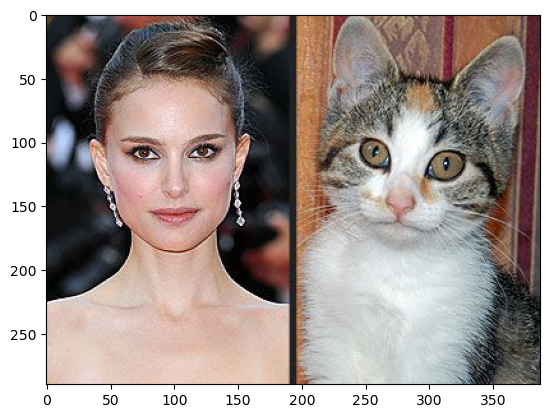

In [13]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

init_image_path = ""
human_crop_data = []
animal_crop_data = []


init_image_path = dataset_dir + crop_data["imagePath"].split("\\")[-1]
print(init_image_path)
init_image = mpimg.imread(init_image_path)

for shape in crop_data["shapes"]:
    if shape["label"] == "human":
        human_crop_data = shape["points"]
    elif shape["label"] == "animal":
        animal_crop_data = shape["points"]

# cv2.imshow("Initial", init_image)
plt.imshow(init_image)

In [28]:
from PIL import Image
import io
import base64

imgdata = base64.b64decode(crop_data["imageData"])
pic = io.BytesIO()
image_string = io.BytesIO(imgdata)

image = Image.open(image_string )
image.size

(387, 290)

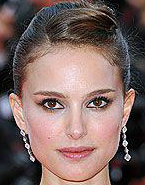

In [31]:
image.crop((start_x, width, start_y, height))

In [32]:
start_x = int(human_crop_data[0][0])
start_y = int(human_crop_data[0][1])
end_x = int(human_crop_data[1][0])
end_y = int(human_crop_data[1][1])

crop_area = (start_x, start_y, end_x, end_y)

cropped_image = image.crop(crop_area)

cropped_image.save("train_0.jpg")

In [47]:
from PIL import Image
import io
import base64

def load_base64_img(imageData):
    imgdata = base64.b64decode(imageData)
    pic = io.BytesIO()
    image_string = io.BytesIO(imgdata)

    loaded_image = Image.open(image_string )
    
    return loaded_image

def crop_image(crop_data, init_image):
    start_x = int(crop_data[0][0])
    start_y = int(crop_data[0][1])
    end_x = int(crop_data[1][0])
    end_y = int(crop_data[1][1])

    crop_area = (start_x, start_y, end_x, end_y)

    cropped_image = init_image.crop(crop_area)

    return cropped_image

In [48]:
processeing_results = glob.glob("./dataset/processed/*.json")

human_face_save_dir = "./dataset/before/human/"
animal_face_save_dir = "./dataset/before/animal/"

for result in processeing_results:
    with open(result) as f:
        crop_data = json.load(f)

    human_crop_data = []
    animal_crop_data = []

    filename = crop_data["imagePath"].split("\\")[-1]

    for shape in crop_data["shapes"]:
        if shape["label"] == "human":
            human_crop_data = shape["points"]
        elif shape["label"] == "animal":
            animal_crop_data = shape["points"]

    # init_image = load_base64_img(crop_data["imageData"])
    init_image = Image.open(os.path.join("./dataset/original/"+filename))
    human_face = crop_image(human_crop_data, init_image)
    animal_face = crop_image(animal_crop_data, init_image)

    human_face.save(os.path.join(human_face_save_dir+filename))
    animal_face.save(os.path.join(animal_face_save_dir+filename))